In [1]:
# import required packages
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
exceldata = pd.read_csv("/Users/apurva/Downloads/combined_youtube_data.csv", encoding='ISO-8859-1')
Youtube_comments = []
Index_datas = []

for idx in exceldata.index:
    comments = exceldata['Featured Video Comment'][idx]
    Youtube_comments.append(str(comments))
    Index_data = exceldata['Index'][idx]
    Index_datas.append(Index_data)


print(len(Youtube_comments))


3055


In [3]:
Youtube_comments = Youtube_comments[:100]
Index_datas = Index_datas[:100]
print(len(Youtube_comments))
print(Youtube_comments)

100
['nan', 'nan', 'Check out my website for complete courses (maximum discounted links) :\n\nhttp://www.bharaththippireddy.com/2020/05/new-course-devops-tools-and-aws-for.html|@~~@|Sorry to ask on this channel  but on the python core and advanced class you teach on udemy  does pycharm work fine? or do we have to use pydev?|@~~@|Broad knowledge explained in 3 minutes  wao', 'Always appreciste your videos and courses', 'nan', 'I hope that you found this video useful learning about the basics of web 3 and its differences from Web 1 & 2. Liked this content?  Buy Me A Kofi To Show Your Support: https://ko-fi.com/P5P34J14C|@~~@|I just finished watching your course "Programming 101" on Udemy. So glad I did. I will be continuing my journey of learning software development and I am happy to have a more intimate understanding of how computers work. Thank you.|@~~@|Hi mate! A few years ago I have seen some of your videos  but then I\'ve lost your channel. Nowadays I\'m learning programming again

In [4]:
final_index_datas = []
youtube_comments_individual = [] 
for i, comment in enumerate(Youtube_comments):
    if comment and comment != 'nan':
        top_comments = comment.split('|@~~@|')[:20]
        for filtered_comment in top_comments:
            final_index_datas.append(Index_datas[i])
            youtube_comments_individual.append(filtered_comment)
        #print(f'{final_index_datas= } ,, {youtube_comments_individual=}')
    else:
        final_index_datas.append(Index_datas[i])
        youtube_comments_individual.append("")

In [5]:
data = {'Index' : final_index_datas,
        'Youtube Comment' : youtube_comments_individual
          }

yt_df = pd.DataFrame(data)
yt_df

,Index,Youtube Comment
0,1,
1,2,
2,3,Check out my website for complete courses (max...
3,3,Sorry to ask on this channel but on the pytho...
4,3,Broad knowledge explained in 3 minutes wao
...,...,...
393,97,Thank u for u awsm videos ....and give some vi...
394,98,Hey Hari its Nick we talked about options in...
395,98,so great wouldnt be for sale
396,99,


In [6]:
yt_df.to_csv('/Users/apurva/Downloads/Youtube_data_comments_segregated.csv')

## Problem statement: Perform sentiment analysis

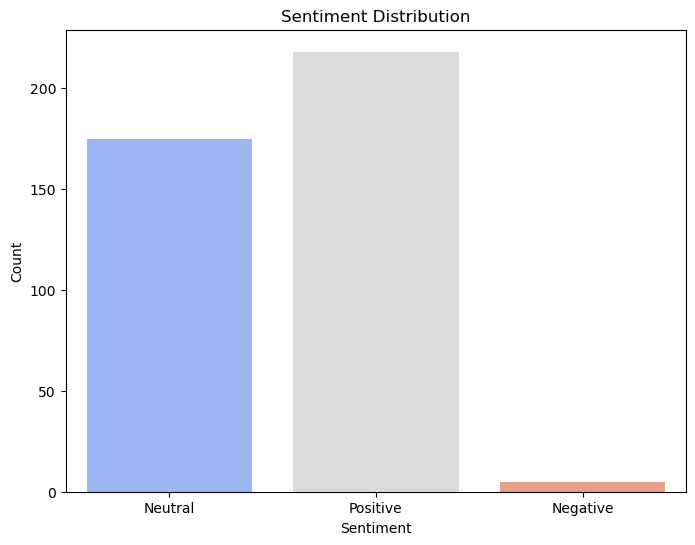

In [7]:
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function for Sentiment Analysis
def analyze_sentiment(text):
    # Check if the input is a non-null string
    if isinstance(text, str):
        # Create a TextBlob object
        analysis = TextBlob(text)
        
        # Get the polarity of the text (ranges from -1 to 1)
        polarity = analysis.sentiment.polarity
        
        # Classify the sentiment
        if polarity > 0:
            return 'Positive'
        elif polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    else:
        # Return 'Neutral' for non-string inputs
        return 'Neutral'

# Load your dataset, replace 'your_dataset.csv' with your file
df = pd.read_csv('/Users/apurva/Downloads/Youtube_data_comments_segregated.csv')

# Apply sentiment analysis to the 'comments' column
df['sentiment'] = df['Youtube Comment'].apply(analyze_sentiment)

# Plot the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

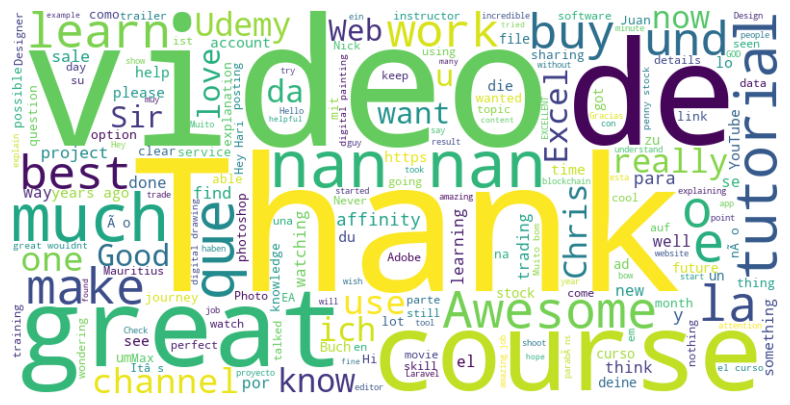

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Function to generate WordCloud
def generate_wordcloud(text):
    # Generate a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Concatenate all comments into a single string
all_comments_text = ' '.join(df['Youtube Comment'].astype(str))

# Generate WordCloud
generate_wordcloud(all_comments_text)

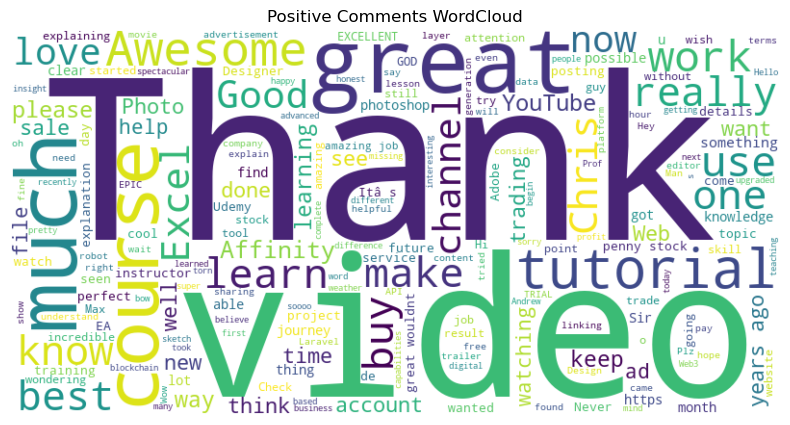

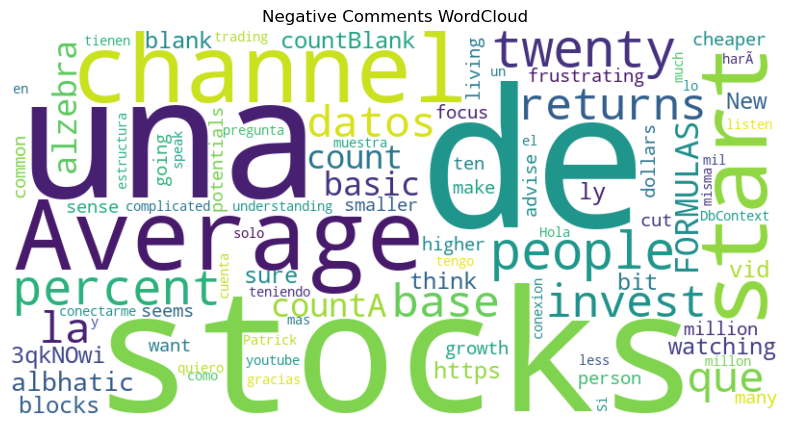

In [9]:
# Separate positive and negative comments
positive_comments = ' '.join(df[df['sentiment'] == 'Positive']['Youtube Comment'].astype(str))
negative_comments = ' '.join(df[df['sentiment'] == 'Negative']['Youtube Comment'].astype(str))

# Function to generate WordCloud
def generate_wordcloud(text, title):
    # Generate a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Generate WordClouds for positive and negative comments
generate_wordcloud(positive_comments, 'Positive Comments WordCloud')
generate_wordcloud(negative_comments, 'Negative Comments WordCloud')
